In [21]:
import os
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

# Create cache directory
os.makedirs("cache", exist_ok=True)
fastf1.Cache.enable_cache("cache")


In [2]:
lap_list = []
weather_list = []
years = range(2015, 2024)
for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
    except Exception:
        continue
    total_rounds = schedule['RoundNumber'].nunique()

    for i in range(1, total_rounds):
        print(year, i)
        race = fastf1.get_session(year, i, 'R')
        race.load(telemetry=False)
        try:
            laps = race.laps
            weather = race.weather_data
            lap_list.append(laps)
            weather_list.append(weather)
        except Exception:
            continue

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 1


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 18 drivers: ['44', '6', '5', '19', '12', '3', '27', '9', '55', '11', '22', '7', '33', '8', '13', '26', '20', '77']
core           INFO 	Loading data for Malaysian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 2


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '6', '7', '77', '19', '33', '55', '26', '3', '8', '12', '11', '27', '98', '13', '22', '14', '9', '28']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 3


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '5', '7', '19', '77', '8', '12', '3', '9', '11', '14', '55', '22', '28', '98', '33', '13', '26', '27']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 4


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '6', '77', '5', '3', '8', '11', '26', '19', '14', '12', '27', '9', '13', '28', '98', '33', '55', '22']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 5


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['6', '44', '5', '77', '7', '19', '3', '8', '55', '26', '33', '12', '11', '9', '27', '22', '28', '98', '13', '14']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 6


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['6', '5', '44', '26', '3', '7', '11', '22', '12', '55', '27', '8', '9', '77', '19', '98', '28', '33', '14', '13']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 7


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '77', '7', '5', '19', '13', '27', '26', '8', '11', '55', '3', '9', '33', '12', '28', '98', '22', '14']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 8


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['6', '44', '19', '5', '77', '27', '13', '33', '11', '3', '12', '26', '9', '98', '8', '55', '22', '28', '7', '14']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 9


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '5', '19', '77', '26', '27', '7', '11', '14', '9', '98', '28', '55', '3', '33', '8', '13', '22', '12']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 10


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '26', '3', '33', '14', '44', '8', '6', '22', '9', '12', '19', '77', '13', '98', '28', '55', '7', '11', '27']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 11


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '8', '26', '11', '19', '7', '33', '77', '9', '12', '5', '14', '22', '98', '28', '55', '3', '13', '27']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 12


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '19', '77', '7', '11', '27', '3', '9', '26', '55', '33', '12', '22', '28', '98', '6', '14', '8', '13']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 13


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '3', '7', '6', '77', '26', '11', '33', '55', '12', '9', '13', '8', '53', '28', '22', '14', '44', '19', '27']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 14


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '5', '7', '77', '27', '8', '13', '33', '55', '14', '11', '26', '9', '3', '22', '19', '53', '28', '12']
core           INFO 	Loading data for Russian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 15


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '11', '19', '26', '12', '13', '7', '22', '33', '14', '77', '98', '28', '3', '55', '8', '6', '27', '9']
core           INFO 	Loading data for United States Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 16


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '5', '33', '11', '22', '55', '13', '12', '3', '14', '53', '26', '27', '9', '7', '19', '8', '77', '28']
core           INFO 	Loading data for Mexican Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 17


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['6', '44', '77', '26', '3', '19', '27', '11', '33', '8', '13', '9', '55', '22', '53', '28', '12', '5', '7', '14']
core           INFO 	Loading data for Brazilian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2015 18


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['6', '44', '5', '7', '77', '27', '26', '8', '33', '13', '3', '11', '12', '22', '14', '9', '28', '53', '55', '19']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 1


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '44', '5', '3', '19', '8', '27', '77', '55', '33', '30', '20', '11', '22', '12', '94', '9', '7', '88', '21', '14', '26']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 2


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '7', '44', '3', '8', '33', '26', '19', '77', '47', '20', '9', '94', '12', '27', '11', '88', '55', '21', '22', '5', '30']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 3


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '5', '26', '3', '7', '19', '44', '33', '55', '77', '11', '14', '22', '21', '27', '9', '20', '94', '8', '12', '88', '30']
core           INFO 	Loading data for Russian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 4


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '44', '7', '77', '19', '14', '20', '8', '11', '22', '3', '55', '30', '9', '26', '12', '21', '94', '33', '5', '27', '88']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 5


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['33', '7', '5', '3', '77', '55', '11', '19', '22', '26', '21', '9', '30', '20', '12', '94', '88', '8', '14', '27', '44', '6']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 6


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '3', '11', '5', '14', '27', '6', '55', '22', '19', '21', '77', '8', '94', '88', '9', '12', '33', '20', '26', '7', '30']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 7


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '5', '77', '33', '6', '7', '3', '27', '55', '11', '14', '26', '21', '8', '9', '20', '94', '12', '88', '19', '30', '22']
core           INFO 	Loading data for European Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 8


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '5', '11', '7', '44', '77', '3', '33', '27', '19', '22', '12', '8', '20', '30', '21', '9', '88', '14', '94', '55', '26']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 9


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '33', '7', '6', '3', '22', '8', '55', '77', '94', '21', '30', '12', '20', '9', '88', '11', '14', '27', '19', '5', '26']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 10


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '33', '6', '3', '7', '11', '27', '55', '5', '26', '19', '22', '14', '77', '12', '21', '20', '30', '88', '8', '9', '94']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 11


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '6', '3', '5', '33', '7', '14', '55', '77', '27', '11', '30', '21', '8', '20', '26', '12', '19', '94', '9', '88', '22']
core           INFO 	Loading data for German Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 12


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '3', '33', '6', '5', '7', '27', '22', '77', '11', '21', '14', '8', '55', '26', '20', '94', '9', '30', '88', '12', '19']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 13


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '3', '44', '27', '11', '5', '14', '77', '7', '19', '33', '21', '8', '26', '30', '31', '12', '20', '9', '55', '22', '94']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 14


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '44', '5', '7', '3', '77', '33', '11', '19', '27', '8', '22', '21', '14', '55', '9', '20', '31', '26', '94', '30', '12']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 15


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '3', '44', '7', '5', '33', '14', '11', '26', '20', '21', '19', '12', '55', '30', '94', '9', '31', '22', '77', '27', '8']
core           INFO 	Loading data for Malaysian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 16


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['3', '33', '6', '7', '77', '11', '14', '27', '22', '30', '55', '9', '19', '26', '94', '31', '12', '44', '21', '20', '8', '5']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 17


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['6', '33', '44', '5', '7', '3', '11', '27', '19', '77', '8', '30', '26', '20', '9', '14', '55', '22', '12', '21', '31', '94']
core           INFO 	Loading data for United States Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 18


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '6', '3', '5', '14', '55', '19', '11', '22', '8', '26', '20', '30', '9', '12', '77', '94', '31', '7', '33', '21', '27']
core           INFO 	Loading data for Mexican Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 19


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '6', '3', '33', '5', '7', '27', '77', '19', '11', '9', '22', '14', '30', '12', '55', '20', '26', '21', '8', '31', '94']
core           INFO 	Loading data for Brazilian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2016 20


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 22 drivers: ['44', '6', '33', '11', '5', '55', '27', '3', '12', '14', '77', '31', '26', '20', '94', '22', '21', '19', '30', '7', '9', '8']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 1


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '77', '7', '33', '19', '11', '55', '26', '31', '27', '36', '2', '14', '20', '18', '3', '9', '30', '8']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 2


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '33', '3', '7', '77', '55', '20', '11', '31', '8', '27', '30', '19', '9', '14', '26', '2', '36', '18']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 3


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '77', '7', '3', '19', '11', '8', '27', '31', '94', '26', '30', '14', '9', '55', '18', '33', '20', '2']
core           INFO 	Loading data for Russian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 4


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['77', '5', '7', '44', '33', '11', '31', '27', '19', '55', '18', '26', '20', '2', '9', '94', '3', '30', '8', '14']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 5


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '3', '11', '31', '27', '55', '94', '26', '8', '9', '14', '19', '20', '30', '18', '77', '2', '33', '7']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 6


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '7', '3', '77', '33', '55', '44', '8', '19', '20', '30', '31', '11', '26', '18', '2', '9', '22', '94', '27']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 7


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '3', '5', '11', '31', '7', '27', '18', '8', '30', '20', '9', '2', '94', '14', '26', '33', '19', '55']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 8


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['3', '77', '18', '5', '44', '31', '20', '55', '14', '94', '9', '2', '8', '7', '11', '19', '27', '33', '26', '30']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 9


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['77', '5', '3', '44', '7', '8', '11', '31', '19', '18', '30', '2', '27', '94', '9', '26', '55', '20', '14', '33']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 10


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '7', '33', '3', '27', '5', '31', '11', '19', '2', '20', '8', '9', '26', '18', '94', '14', '55', '30']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 11


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '7', '77', '44', '33', '14', '55', '11', '31', '2', '26', '30', '20', '18', '94', '9', '27', '40', '8', '3']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 12


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '3', '7', '77', '27', '8', '19', '31', '55', '18', '26', '30', '2', '20', '9', '11', '14', '33', '94']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 13


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '5', '3', '7', '31', '18', '19', '11', '33', '20', '26', '27', '55', '8', '94', '14', '9', '2', '30']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 14


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '3', '77', '55', '11', '30', '2', '18', '8', '31', '19', '94', '20', '27', '9', '26', '14', '5', '33', '7']
core           INFO 	Loading data for Malaysian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 15


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '3', '5', '77', '11', '2', '18', '19', '31', '14', '20', '8', '10', '30', '27', '94', '9', '55', '7']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 16


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '3', '77', '7', '31', '11', '20', '8', '19', '14', '30', '10', '2', '94', '18', '27', '9', '5', '55']
core           INFO 	Loading data for United States Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 17


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '7', '33', '77', '31', '55', '11', '19', '26', '18', '2', '39', '8', '9', '20', '14', '3', '94', '27']
core           INFO 	Loading data for Mexican Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 18


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '7', '5', '31', '18', '11', '20', '44', '14', '19', '2', '10', '94', '8', '55', '9', '28', '27', '3']
core           INFO 	Loading data for Brazilian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


2017 19


logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '77', '7', '44', '33', '3', '19', '14', '11', '27', '55', '10', '9', '94', '8', '18', '28', '31', '2', '20']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 1


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.123000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55', '11', '31', '16', '18', '28', '8', '20', '10', '9', '35']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 2


core        WARNING 	Driver 27: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  9: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 31: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  8: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 18: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 35: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 28: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '77', '44', '10', '20', 

2018 3


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.025000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '77', '7', '44', '33', '27', '14', '5', '55', '20', '31', '11', '2', '18', '35', '9', '8', '10', '16', '28']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


2018 4


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.110000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '11', '5', '55', '16', '14', '18', '2', '28', '9', '10', '20', '77', '8', '33', '3', '27', '31', '35']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req           

2018 5


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.017000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '5', '3', '20', '55', '14', '11', '16', '18', '28', '9', '35', '2', '31', '7', '8', '10', '27']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 6


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.040000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '5', '44', '7', '77', '31', '10', '27', '33', '55', '9', '11', '20', '2', '8', '35', '18', '16', '28', '14']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 7


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.044000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['5', '77', '33', '3', '44', '7', '27', '55', '31', '16', '10', '8', '20', '11', '9', '2', '35', '14', '28', '18']
core           INFO 	Loading data for French Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 8


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.028000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '7', '3', '5', '20', '77', '55', '27', '16', '8', '2', '9', '28', '35', '14', '18', '11', '31', '10']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 9


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.049000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '7', '5', '8', '20', '31', '11', '14', '16', '9', '10', '55', '35', '18', '2', '44', '28', '3', '77', '27']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 10


core        WARNING 	Driver  2: Lap timing integrity check failed for 2 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.014000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '77', '3', '27', '31', '14', '20', '11', '2', '18', '10', '35', '33', '8', '55', '9', '16', '28']
core           INFO 	Loading data for German Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing

2018 11


core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.054000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '7', '33', '27', '8', '11', '31', '9', '28', '20', '55', '2', '10', '16', '14', '18', '5', '35', '3']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Proces

2018 12


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.112000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '7', '3', '77', '10', '20', '14', '55', '8', '28', '27', '31', '11', '9', '35', '18', '2', '33', '16']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 13


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.033000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '33', '77', '11', '31', '8', '20', '10', '9', '55', '35', '18', '28', '2', '3', '7', '16', '14', '27']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 14


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.051000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '77', '5', '33', '31', '11', '55', '18', '35', '16', '2', '27', '10', '9', '20', '3', '14', '28', '8']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 15


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.017000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '5', '77', '7', '3', '14', '55', '16', '27', '9', '2', '10', '18', '8', '11', '28', '20', '35', '31']
core           INFO 	Loading data for Russian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 16


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.089000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '5', '7', '33', '3', '16', '20', '31', '11', '8', '27', '9', '14', '18', '2', '55', '35', '10', '28']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 17


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.042000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '3', '7', '5', '11', '8', '31', '55', '10', '9', '28', '14', '2', '35', '18', '16', '27', '20']
core           INFO 	Loading data for United States Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 18


core        WARNING 	Driver 18: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 7 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['7', '33', '44', '5', '77', '27', '55', '11', '28', '9', '2', '10', '35', '18', '16', '3', '8', '14', '31', '20']
core           INFO 	Loading data for Mexican Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processin

2018 19


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '5', '7', '44', '77', '27', '16', '2', '9', '10', '31', '18', '35', '28', '20', '8', '3', '11', '55', '14']
core           INFO 	Loading data for Brazilian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2018 20


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.157000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '7', '3', '77', '5', '16', '8', '20', '11', '28', '55', '10', '2', '31', '35', '14', '18', '27', '9']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 1


core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 77 completed the race distance 00:00.387000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '5', '16', '20', '27', '7', '18', '26', '10', '4', '11', '23', '99', '63', '88', '8', '3', '55']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Process

2019 2


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.070000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '16', '33', '5', '4', '7', '10', '23', '11', '99', '26', '20', '18', '63', '88', '27', '3', '55', '8']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 3


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.423000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '5', '33', '16', '10', '3', '11', '7', '23', '8', '18', '20', '55', '99', '63', '88', '4', '26', '27']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 4


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 77 completed the race distance 00:00.075000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '5', '33', '16', '11', '55', '4', '18', '7', '23', '99', '20', '27', '63', '88', '10', '8', '26', '3']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 5


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '5', '16', '10', '20', '55', '26', '8', '23', '3', '27', '7', '11', '99', '63', '88', '18', '4']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 6


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.087000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '77', '33', '10', '55', '26', '23', '3', '8', '4', '11', '27', '20', '63', '18', '7', '88', '99', '16']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 7


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 completed the race distance 00:00.190000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '16', '77', '33', '3', '27', '10', '18', '26', '55', '11', '99', '8', '7', '63', '20', '88', '23', '4']
core           INFO 	Loading data for French Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


2019 8


core        WARNING 	Driver 27: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.126000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '16', '33', '5', '55', '7', '27', '4', '10', '3', '11', '18', '26', '23', '99', '20', '88', '63', '8']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Proces

2019 9


req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 33 completed the race distance 00:00.042000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['33', '16', '77', '5', '44', '4', '10', '55', '7', '99', '11', '3', '27', '18', '23', '8', '26', '63', '20', '88']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...


2019 10


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['20']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
req            INFO 	No cached data found for weather_data. Loading data...
_api           INFO 	Fetching weather data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for race_control_messages. L

2019 11


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

2019 12


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2019 13


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

2019 14


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2019 15


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

2019 16


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2019 17


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  5: Ignoring late data f

2019 18


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2019 19


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2019 20


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 20: Encountered 1 timing

2020 1


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 63: Encountered 1 timing

2020 2


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

2020 3


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 4


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  4: Ignoring late data f

2020 5


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 6


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 7


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 26: Ignoring late data f

2020 8


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 9


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 10


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 11


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  7: Ignoring late data f

2020 12


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 77: Ignoring late data f

2020 13


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 14


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 15


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 55: Encountered 1 timing

2020 16


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2020 17


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2021 1


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2021 2


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2021 3


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 44: Ignoring late data f

2021 4


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 55: Ignoring late data f

2021 5


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2021 6


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 47: Ignoring late data f

2021 7


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

2021 8


core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNING 	Failed to load track status data!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
logger  

2021 9


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 10


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 11


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 12


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 13


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 14


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 15


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 16


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 17


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 18


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 19


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 20


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 21


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

2021 22


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

In [4]:

def evaluate_pit_lap_gain(lap_list):
    results = []
    for laps_df, weather_df in zip(lap_list, weather_list):
        for driver_code in laps_df["Driver"].unique():
            driver_laps = laps_df[laps_df['Driver'] == driver_code].sort_values('LapNumber')
            pit_laps = driver_laps[driver_laps['PitInTime'].notna()]

            
            for _, pit_row in pit_laps.iterrows():
                pit_lap = pit_row['LapNumber']
                
                # Get 3 laps before
                before_laps = driver_laps[(driver_laps['LapNumber'] >= pit_lap - 4) & 
                                        (driver_laps['LapNumber'] < pit_lap - 1)]
                
                after_laps = driver_laps[(driver_laps['LapNumber'] > pit_lap + 1) & 
                                        (driver_laps['LapNumber'] <= pit_lap + 4)]
                
                
                before = before_laps['LapTime'].dt.total_seconds().dropna()
                after = after_laps['LapTime'].dt.total_seconds().dropna()
                
                
                
                if len(before) >= 2 and len(after) >= 2:
                    delta = before.mean() - after.mean()
                    pct_gain = delta/before.mean()
                    if np.abs(pct_gain) > 0.3: continue
                    compound_before = before_laps.iloc[-1]['Compound'] if not before_laps.empty else None
                    compound_after = after_laps.iloc[0]['Compound'] if not after_laps.empty else None
                
                    pit_time = pit_row['PitInTime']
                    weather_data = weather_df
                    pit_weather = weather_data[weather_data['Time'] > pit_time]
                    if pit_weather.shape[0] > 0: pit_weather = pit_weather.iloc[0]
                    else: continue

                    results.append({
                        'Driver': driver_code,
                        'PitLap': pit_lap,
                        'AvgLapBefore': before.mean(),
                        'AvgLapAfter': after.mean(),
                        'LapTimeGain': delta,
                        'CompoundBefore': compound_before,
                        'CompoundAfter': compound_after,
                        'AirTemp': pit_weather["AirTemp"],
                        'Humidity': pit_weather["Humidity"],
                        'Pressure': pit_weather["Pressure"],
                        'Rainfall': pit_weather["Rainfall"],
                        'TrackTemp': pit_weather["TrackTemp"],
                        'WindDirection': pit_weather["WindDirection"],
                        "WindSpeed": pit_weather["WindSpeed"]})

    
    return pd.DataFrame(results)

pit_changes = evaluate_pit_lap_gain(lap_list)
print((pit_changes["LapTimeGain"]/pit_changes["AvgLapBefore"]).mean())


-0.00019455033294922883


In [5]:
pit_changes["LapTimeGain"]/pit_changes["AvgLapBefore"]

0      -0.007130
1      -0.000409
2       0.203553
3      -0.296007
4      -0.237314
          ...   
1607    0.019883
1608    0.018728
1609    0.020512
1610    0.020925
1611    0.018713
Length: 1612, dtype: float64

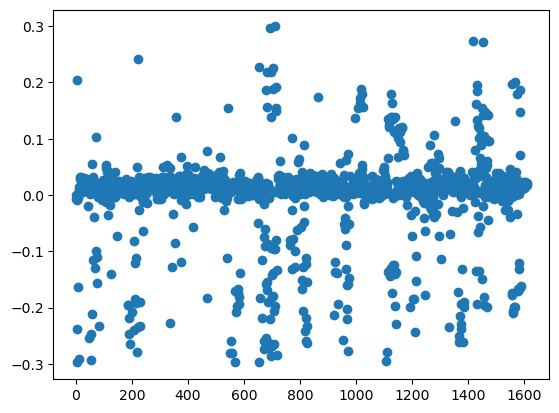

In [6]:
plt.figure()
plt.plot(pit_changes["LapTimeGain"]/pit_changes["AvgLapBefore"], 'o')
plt.show()

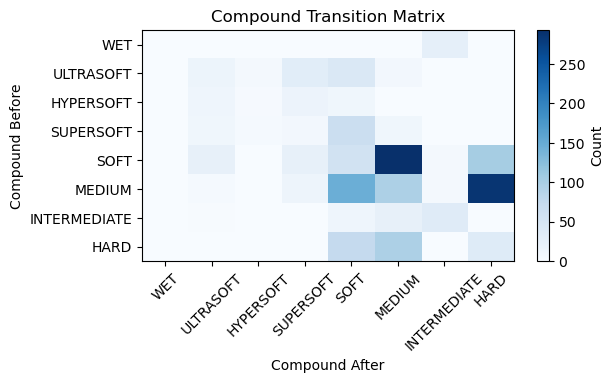

In [62]:
order = ["WET", "ULTRASOFT", "HYPERSOFT", "SUPERSOFT", "SOFT", "MEDIUM", "INTERMEDIATE", "HARD"]
transition_matrix = pd.crosstab(pit_changes["CompoundBefore"], pit_changes["CompoundAfter"])
transition_matrix = transition_matrix.reindex(index=order, columns=order, fill_value=0)

plt.figure(figsize=(6, 3))
plt.imshow(transition_matrix, cmap="Blues", aspect="auto")
plt.xticks(ticks=np.arange(len(transition_matrix.columns)), labels=transition_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(transition_matrix.index)), labels=transition_matrix.index)
plt.xlabel("Compound After")
plt.ylabel("Compound Before")
plt.title("Compound Transition Matrix")
plt.colorbar(label="Count")
plt.show()

In [ ]:
data = pit_changes.copy()
y = data["LapTimeGain"]/data["AvgLapBefore"]
data.drop(columns = ["Driver", "PitLap", 'AvgLapBefore', 'AvgLapAfter', 'LapTimeGain'], inplace=True)
X = data[[column for column in data.columns if column != "y"]]

cat_cols = ['CompoundBefore', 'CompoundAfter']

for col in cat_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print(X_train.shape, X_test.shape)
train_mse = []
test_mse = []
for depth in range(1, 10):
    params = {
        'objective': 'reg:squarederror', 'learning_rate': 0.3, 'max_depth': depth, 'subsample': 0.5, 'seed': 1
    }
    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)
    num_rounds = 100
    model = xgb.train(params, dtrain, num_rounds)

    y_pred_train = model.predict(dtrain)
    # print(any(np.isnan(y_train)))
    y_pred = model.predict(dtest)
    rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

    train_mse.append(rmse_train)
    test_mse.append(rmse)
print(f"Test RMSE: {rmse:.5f}", f"Train RMSE: {rmse_train:.5f}")
print(f"Pred_mean: {y_pred.mean()}")
mean = y.mean()
print(f"Mean: {mean}, mean_rmse: {np.sqrt(np.mean((y_test - mean) ** 2))}")
# print(X_train)

(1289, 9) (323, 9)
Test RMSE: 0.05451 Train RMSE: 0.01321
Pred_mean: -0.0026633618399500847
Mean: -0.00019455033294922883, mean_rmse: 0.08014356310509292


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pit_changes.copy()
y = data["LapTimeGain"] / data["AvgLapBefore"]
data.drop(columns=["Driver", "PitLap", "AvgLapBefore", "AvgLapAfter", "LapTimeGain"], inplace=True)
X = data[[column for column in data.columns if column != "y"]]

cat_cols = ['CompoundBefore', 'CompoundAfter']
X = pd.get_dummies(X, columns=cat_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse:.5f}", f"Train RMSE: {rmse_train:.5f}")
print(f"Pred_mean: {y_pred.mean()}")
mean = y.mean()
print(f"Mean: {mean}, mean_rmse: {np.sqrt(np.mean((y_test - mean) ** 2))}")

Test RMSE: 0.07834 Train RMSE: 0.06894
Pred_mean: 0.002978873857742362
Mean: -0.00019455033294922883, mean_rmse: 0.08014356310509292


[0.06327021294391028, 0.04540040051778599, 0.03325587115050455, 0.023612372575061286, 0.018371956203636776, 0.015278219724675916, 0.014274628335769753, 0.013598620896084272, 0.01320944885703078]


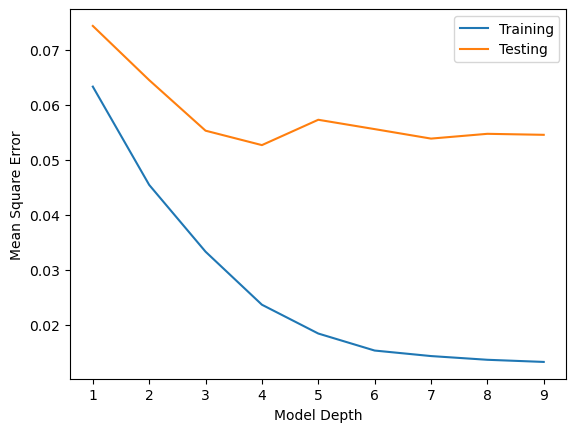

In [8]:
print(train_mse)
plt.figure()
plt.plot(range(1, 10), train_mse)
plt.plot(range(1, 10), test_mse)
plt.xlabel("Model Depth")
plt.ylabel("Mean Square Error")
plt.legend(["Training", "Testing"])
plt.show()

In [ ]:
data = pit_changes.copy()
y = data["LapTimeGain"]/data["AvgLapBefore"]
data.drop(columns = ["Driver", "PitLap", 'AvgLapBefore', 'AvgLapAfter', 'LapTimeGain'], inplace=True)
X = data[[column for column in data.columns if column != "y"]]

cat_cols = ['CompoundBefore', 'CompoundAfter']

for col in cat_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print(X_train.shape, X_test.shape)
train_mse = []
test_mse = []
depth = 4
params = {
    'objective': 'reg:squarederror', 'learning_rate': 0.3, 'max_depth': depth, 'subsample': 0.5, 'seed': 1
}
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

y_pred_train = model.predict(dtrain)
# print(any(np.isnan(y_train)))
y_pred = model.predict(dtest)
rmse_train = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

train_mse.append(rmse_train)
test_mse.append(rmse)
print(f"Test RMSE: {rmse:.5f}", f"Train RMSE: {rmse_train:.5f}")
print(f"Pred_mean: {y_pred.mean()}")
mean = y.mean()
print(f"Mean: {mean}, mean_rmse: {np.sqrt(np.mean((y_test - mean) ** 2))}")
# print(X_train)

(1289, 9) (323, 9)
Test RMSE: 0.05263 Train RMSE: 0.02361
Pred_mean: -0.0005439363303594291
Mean: -0.00019455033294922883, mean_rmse: 0.08014356310509292


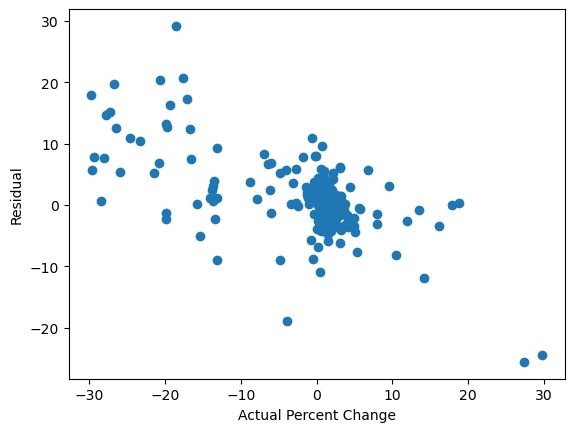

In [10]:
plt.figure()
plt.plot(y_test * 100, 100 * (y_pred - y_test), 'o')
plt.xlabel("Actual Percent Change")
plt.ylabel("Residual")
plt.show()

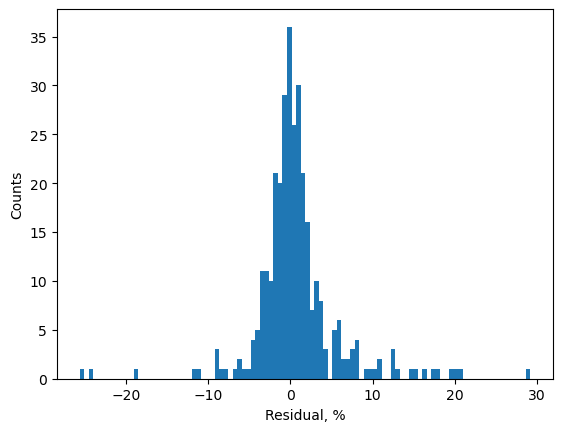

In [13]:
residual = 100 * (y_pred - y_test)
plt.figure()
plt.hist(residual, bins=100)
plt.ylabel("Counts")
plt.xlabel("Residual, %")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

data = pit_changes.copy()

y = data['CompoundAfter']
le = LabelEncoder()
y = le.fit_transform(y)
data.drop(columns = ["Driver", "PitLap", 'AvgLapBefore', 'AvgLapAfter', 'LapTimeGain', 'CompoundAfter'], inplace=True)
X = data[[column for column in data.columns if column != "y"]]

cat_cols = ['CompoundBefore']

for col in cat_cols:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

clf = XGBClassifier(
    objective='multi:softprob', learning_rate=0.3, max_depth=5, subsample=0.5, seed=42, enable_categorical=True, n_estimators=100
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Train Accuracy:", np.mean(y_pred_train == y_train))
print("Accuracy:", np.mean(y_pred == y_test))

most_common = np.bincount(y_test).argmax()
baseline_acc = np.mean(y_test == most_common)
print("Baseline accuracy (most common class):", baseline_acc)

Train Accuracy: 0.95655546935609
Accuracy: 0.7306501547987616
Baseline accuracy (most common class): 0.3591331269349845


In [57]:
print(X.columns)

Index(['CompoundBefore', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

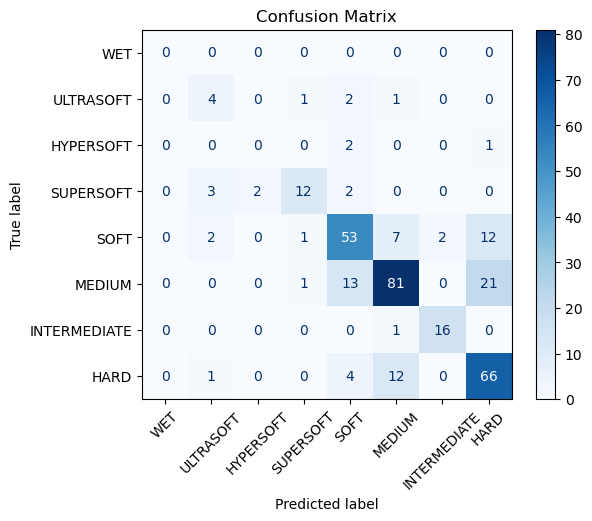

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ordered_indices = [list(le.classes_).index(c) for c in order if c in le.classes_]

cm = confusion_matrix(y_test, y_pred, labels=ordered_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[le.classes_[i] for i in ordered_indices])
plt.figure()
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

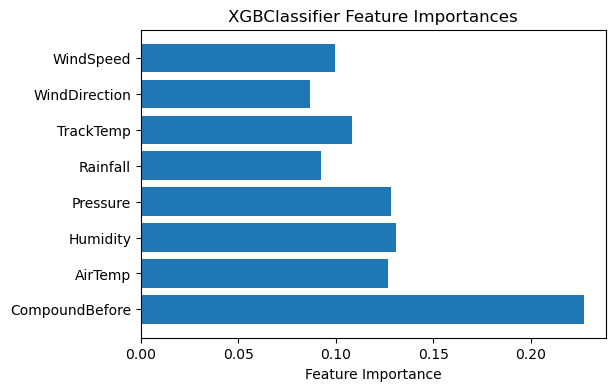

In [69]:
importances = clf.feature_importances_
features = clf.feature_names_in_

plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("XGBClassifier Feature Importances")
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

data = pit_changes.copy()

y = data['CompoundAfter']
le = LabelEncoder()
y = le.fit_transform(y)
data.drop(columns = ["Driver", "PitLap", 'AvgLapBefore', 'AvgLapAfter', 'LapTimeGain', 'CompoundAfter'], inplace=True)
X = data[[column for column in data.columns if column != "y"]]

cat_cols = ['CompoundBefore']

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

rf_clf = RandomForestClassifier(
    n_estimators=5,
    max_depth=15,
    random_state=42
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)
print("Train Accuracy:", np.mean(y_pred_train == y_train))
print("Accuracy:", np.mean(y_pred == y_test))

most_common = np.bincount(y_test).argmax()
baseline_acc = np.mean(y_test == most_common)
print("Baseline accuracy (most common class):", baseline_acc)

Train Accuracy: 0.9146625290923196
Accuracy: 0.718266253869969
Baseline accuracy (most common class): 0.3591331269349845
